In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
classes = df['label'].unique()
print("classes: ", classes)

print(df['label'].value_counts())

classes:  [1 0 4 7 3 5 8 9 2 6]
label
1    2346
3    2138
7    2130
2    2072
6    2050
9    2044
4    2037
0    2010
8    1968
5    1858
Name: count, dtype: int64


In [6]:
pixel_values = df.drop(columns=['label'])
targets = df['label']

print(pixel_values.shape)
print(targets.shape)

(20653, 784)
(20653,)


In [14]:
pixel_values = pixel_values.dropna()

In [16]:
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values)

In [17]:
import joblib
joblib.dump(tsne, 'tsne_model.pkl')

['tsne_model.pkl']

In [25]:
tsne_df = pd.DataFrame((transformed_data), columns=["X", "y"])
tsne_df = pd.concat([tsne_df, targets], axis=1)

In [26]:
tsne_df.head()

,X,y,label
0,-46.959202,-35.372078,1
1,78.426231,-12.039645,0
2,-88.499298,-7.445891,1
3,17.606241,77.141556,4
4,87.727455,-32.672821,0


Text(0.5, 1.0, 'CLustered data after t-SNE transformation')

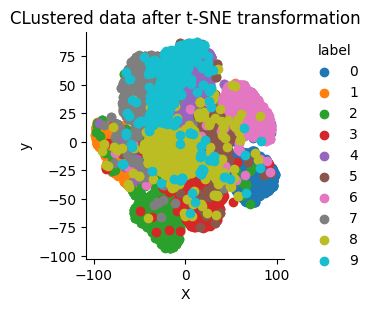

In [28]:
grid = sns.FacetGrid(tsne_df, hue="label")
grid.map(plt.scatter, "X", "y").add_legend()
plt.title("CLustered data after t-SNE transformation")

In [31]:
train_pixel_values = tsne_df.drop(columns=['label'])
train_targets = tsne_df['label']

print(train_pixel_values.shape)
print(train_targets.shape)

(20653, 2)
(20653,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_pixel_values, train_targets,
                                                    test_size=0.2, random_state=42,
                                                    stratify=train_targets)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16522, 2)
(4131, 2)
(16522,)
(4131,)


In [66]:
%%time
# Training Accuracy and training RFC
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=60, max_depth=10)
RFC.fit(X_train, Y_train)

CPU times: user 1.5 s, sys: 5.94 ms, total: 1.5 s
Wall time: 1.58 s


RandomForestClassifier(max_depth=10, n_estimators=60)

In [67]:
%%time
# Evaluation
Y_train_pred = RFC.predict(X_train)
print("Training Accuracy: ", accuracy_score(Y_train_pred, Y_train))

Training Accuracy:  0.968950490255417
CPU times: user 85.2 ms, sys: 0 ns, total: 85.2 ms
Wall time: 86.4 ms


In [68]:
%%time
# Evaluation
Y_test_pred = RFC.predict(X_test)
print("Testing Accuracy: ", accuracy_score(Y_test_pred, Y_test))

Testing Accuracy:  0.9576373759380296
CPU times: user 25.7 ms, sys: 0 ns, total: 25.7 ms
Wall time: 26.5 ms
